# Shearfree Cylindrical Gravitational Collapse by Prisco Herrera MacCallum and Santos
##  Geoff Cope
##  Univeristy of Utah
##  December 31, 2021

This notebook threw some very strange errors.  It gave errors when trying to solve for derivatives of psi and gamma, no idea why.  Check and see - there's the variable R and then Ricci Tensor is also R.  So, fix this

https://arxiv.org/abs/0904.0706

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
T,R,phi,z,dT,dR,dphi,dz = symbols( 'T R phi z dT dR dphi dz' ) 

In [4]:
psi = Function('psi')(R,T)
psi

In [5]:
gamma = Function('gamma')(R,T)
gamma

In [6]:
variables = Matrix( [T,R,phi,z] )
variables

⎡T⎤
⎢ ⎥
⎢R⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix( [dT,dR,dphi,dz] ) 
differentials

⎡ dT ⎤
⎢    ⎥
⎢ dR ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( - exp(2*(gamma-psi))*(dT**2 - dR**2) + exp(2*psi)*dz**2 + R**2 * exp(-2*psi) * dphi**2 )
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(R, T)  -2⋅ψ(R, T)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(R, T)  -2⋅ψ(R, T)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(R, T)            ⎥
⎢           0                       0             R ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(R, T)⎥
⎣           0                       0                   0         ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡  2⋅γ(R, T)  -2⋅ψ(R, T)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(R, T)  -2⋅ψ(R, T)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(R, T)            ⎥
⎢           0                       0             R ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(R, T)⎥
⎣           0                       0                   0         ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("T R phi z")
T,R,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                           
⎢⎡ ⎛     2⋅γ(R, T)  -2⋅ψ(R, T) ∂                2⋅γ(R, T)  -2⋅ψ(R, T) ∂          ⎞  -2⋅γ(R, 
⎢⎢-⎜- 2⋅ℯ         ⋅ℯ          ⋅──(γ(R, T)) + 2⋅ℯ         ⋅ℯ          ⋅──(ψ(R, T))⎟⋅ℯ        
⎢⎢ ⎝                           ∂T                                     ∂T         ⎠          
⎢⎢──────────────────────────────────────────────────────────────────────────────────────────
⎢⎢                                                   2                                      
⎢⎢                                                                                          
⎢⎢ ⎛     2⋅γ(R, T)  -2⋅ψ(R, T) ∂                2⋅γ(R, T)  -2⋅ψ(R, T) ∂          ⎞  -2⋅γ(R, 
⎢⎢-⎜- 2⋅ℯ         ⋅ℯ          ⋅──(γ(R, T)) + 2⋅ℯ         ⋅ℯ          ⋅──(ψ(R, T))⎟⋅ℯ        
⎢⎢ ⎝                           ∂R                                     ∂R         ⎠          
⎢⎢────────────────────────────────────────────────────────────────────

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞           
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂       
⎢R⋅⎜───(γ(R, T)) - ───(γ(R, T)) - ───(ψ(R, T)) - 2⋅⎜──(ψ(R, T))⎟  + ───(ψ(R, T))⎟ + ──(γ(R, 
⎢  ⎜  2              2              2              ⎝∂T         ⎠      2         ⎟   ∂R      
⎢  ⎝∂R             ∂T             ∂R                                ∂T          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                     R                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                               ∂     

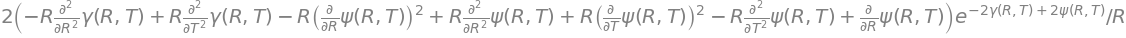

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞           
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂       
⎢R⋅⎜───(γ(R, T)) - ───(γ(R, T)) - ───(ψ(R, T)) - 2⋅⎜──(ψ(R, T))⎟  + ───(ψ(R, T))⎟ + ──(γ(R, 
⎢  ⎜  2              2              2              ⎝∂T         ⎠      2         ⎟   ∂R      
⎢  ⎝∂R             ∂T             ∂R                                ∂T          ⎠           
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                     R                                     
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                        ∂                                               ∂  
⎢               2                2   1.0⋅──(γ(R, T))                                     ──(
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂R                    ∂           ∂             ∂T 
⎢- ⎜──(ψ(R, T))⎟  - ⎜──(ψ(R, T))⎟  + ───────────────       - 2⋅──(ψ(R, T))⋅──(ψ(R, T)) + ───
⎢  ⎝∂R         ⎠    ⎝∂T         ⎠           R                  ∂R          ∂T               
⎢                                                                                           
⎢                                   ∂                                                       
⎢                                   ──(γ(R, T))                      2                2   1.
⎢         ∂           ∂             ∂T                  ⎛∂          ⎞    ⎛∂          ⎞      
⎢     - 2⋅──(ψ(R, T))⋅──(ψ(R, T)) + ───────────       - ⎜──(ψ(R, T))⎟  - ⎜──(ψ(R, T))⎟  + ──
⎢         ∂R          ∂T                 R              ⎝∂R         ⎠ 

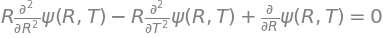

In [30]:
equation21 = Eq(Ric.tensor()[2,2].args[1],0)
equation21

In [23]:
equation22a = Eq(  diff(gamma,T) , solve( Ric.tensor()[1,0] , diff(gamma,T) )[0] ) 
equation22a

In [24]:
equation22b = simplify( Ric.tensor()[0,0] + Ric.tensor()[1,1] )
equation22b

In [32]:
vacuumFieldEquations = Matrix([equation21,equation22a,equation22b])
vacuumFieldEquations

⎡      2                2                             ⎤
⎢     ∂                ∂             ∂                ⎥
⎢  R⋅───(ψ(R, T)) - R⋅───(ψ(R, T)) + ──(ψ(R, T)) = 0  ⎥
⎢      2                2            ∂R               ⎥
⎢    ∂R               ∂T                              ⎥
⎢                                                     ⎥
⎢      ∂                 ∂           ∂                ⎥
⎢      ──(γ(R, T)) = 2⋅R⋅──(ψ(R, T))⋅──(ψ(R, T))      ⎥
⎢      ∂T                ∂R          ∂T               ⎥
⎢                                                     ⎥
⎢                                          ∂          ⎥
⎢                 2                  2   2⋅──(γ(R, T))⎥
⎢    ⎛∂          ⎞      ⎛∂          ⎞      ∂R         ⎥
⎢- 2⋅⎜──(ψ(R, T))⎟  - 2⋅⎜──(ψ(R, T))⎟  + ─────────────⎥
⎣    ⎝∂R         ⎠      ⎝∂T         ⎠          R      ⎦

In [33]:
from sympy import *

In [34]:
X, Y = map(Function, 'XY')

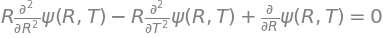

In [35]:
eq = vacuumFieldEquations[0]
eq

In [36]:
xODE = Eq(pde_separate( eq, psi, [X(R),Y(T)])[0] , k**2 ) 
xODE

ValueError: Dimension of index greater than rank of array